# NYC AirBnB Visualization

M. Alfian Prasetyo

In [45]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# read dataset
df = pd.read_csv('dataset_airbnb.csv')
pd.set_option('display.max_columns', None)  # to show all columns

df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [47]:
df.sample(10)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
47424,35721596,21942647,Langston,Queens,Long Island City,40.75777,-73.93509,Private room,125,1,0,NaN,NaN,1,358
30626,23690062,175180318,Gúney,Manhattan,Hell's Kitchen,40.76502,-73.98702,Shared room,75,1,59,6/23/2019,3.64,6,174
41442,32239039,219517861,Sonder (NYC),Manhattan,Financial District,40.70775,-74.01050,Entire home/apt,215,2,9,6/11/2019,2.31,327,313
12200,9459232,4052055,Lorien,Manhattan,East Village,40.72400,-73.98376,Private room,45,1,1,12/21/2015,0.02,1,0
38841,30402045,171673961,Eric,Brooklyn,Bedford-Stuyvesant,40.67896,-73.90892,Private room,25,2,2,1/1/2019,0.30,1,0
46355,35220477,265188674,Yehoshua,Brooklyn,Crown Heights,40.66819,-73.93783,Entire home/apt,275,2,2,6/30/2019,2.00,1,356
20592,16365878,107177716,Yuki,Brooklyn,Bedford-Stuyvesant,40.68712,-73.94708,Entire home/apt,130,2,168,6/29/2019,5.45,1,203
10509,8061409,1100659,Joe,Brooklyn,Bushwick,40.70520,-73.91549,Private room,49,1,107,6/9/2019,3.04,1,340
41851,32541965,168495229,Daisy,Brooklyn,Crown Heights,40.66661,-73.95367,Private room,48,5,2,4/8/2019,0.48,1,15
42250,32799550,211136294,Sharon & Erika,Bronx,Schuylerville,40.83647,-73.83491,Private room,65,2,5,6/1/2019,1.90,5,183


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

Each column in the dataframe gives us information about the property.

- `host_id` and `host_name` are identification ids of the host for Airbnb
- There are five groups in `neighbourhood_group`, shown above
- `neighbourhood` tells us which specific neighbourhood in the group the property belongs to
- `latitude` and `longitude` give us the coordinates of the location
- `room_type` indicates the type of room the property is
- `price` is price 
- `minimum_nights` are the minimum number of nights the property has to be booked for
- `number_of_reviews`, `last_review`, and `reviews_per_month` give us information about the reviews of each property
- `calculated_host_listings_count` and `availability_365` are additional features that tell us how many total properties the host has, 
and how long this property is available in a year

## preprocessing

In [108]:
# change datatypes
df['id'] = df['id'].astype('str') 
df['host_id'] = df['host_id'].astype('str') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   host_id                         48895 non-null  object 
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     48895 non-null  object 
 12  reviews_per_month               

In [49]:
# check null values
df.isna().sum()

id                                    0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [50]:
# handling null values
df['host_name'] = df['host_name'].fillna('Unknown')
df['last_review'] = df['last_review'].fillna('Unknown')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# check null values again
df.isna().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [66]:
#check duplicated data
df.duplicated().sum()

0

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     48895 non-null  object 
 12  reviews_per_month               

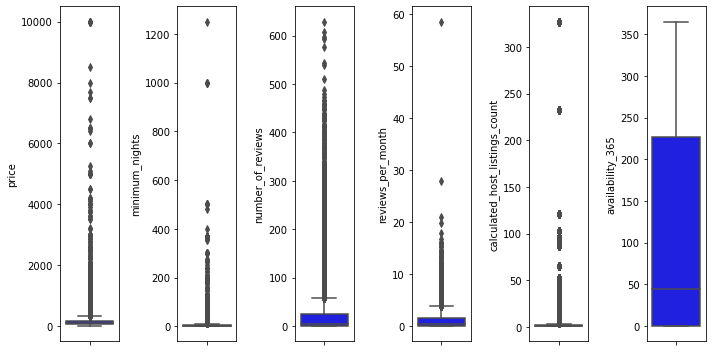

In [71]:
#outliers
nums = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

features = nums
plt.figure(figsize=(10, 5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

## EDA

### top 10 host

In [51]:
top_host_listing = df.groupby(['host_id', 'host_name'])['host_id'].count().reset_index(name='host_listing_count')

top_host_listing['name_id'] = top_host_listing['host_name'] + ' (' + top_host_listing['host_id'].astype(str) + ')'
top_host_listing.sort_values(by=['host_listing_count'], ascending = False, inplace=True)
top_host_listing

,host_id,host_name,host_listing_count,name_id
34646,219517861,Sonder (NYC),327,Sonder (NYC) (219517861)
29407,107434423,Blueground,232,Blueground (107434423)
19574,30283594,Kara,121,Kara (30283594)
31079,137358866,Kazuya,103,Kazuya (137358866)
14436,16098958,Jeremy & Laura,96,Jeremy & Laura (16098958)
...,...,...,...,...
13358,13540183,Ashley,1,Ashley (13540183)
13357,13538150,Mariana,1,Mariana (13538150)
13356,13535952,Nastassia,1,Nastassia (13535952)
13355,13533446,Daniel,1,Daniel (13533446)


top10 = top_host_listing.head(10)
top10

Text(0, 0.5, 'Host name id')

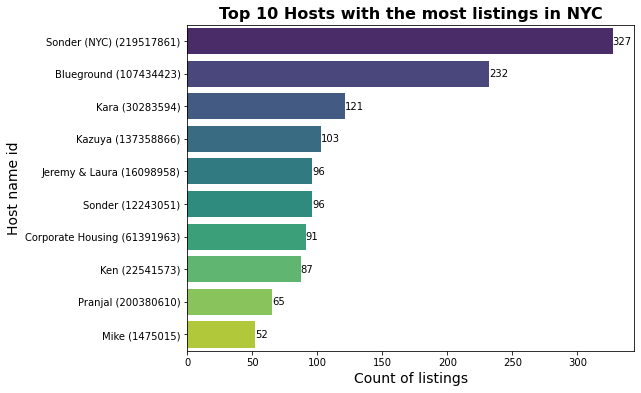

In [112]:
plt.figure(figsize=(8,6))
v1 = sns.barplot(x="host_listing_count", y="name_id", data=top10, palette='viridis')
for i in v1.containers:
    v1.bar_label(i,)

plt.title('Top 10 Hosts with the most listings in NYC', fontsize= 16, fontweight='bold' )
plt.xlabel('Count of listings', fontsize= 14)
plt.ylabel('Host name id', fontsize= 14)

### popular neighbourhood group

In [134]:
property_count = df.groupby(['neighbourhood_group', 'room_type'])['host_id'].count().reset_index(name='count')

property_count

,neighbourhood_group,room_type,count
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


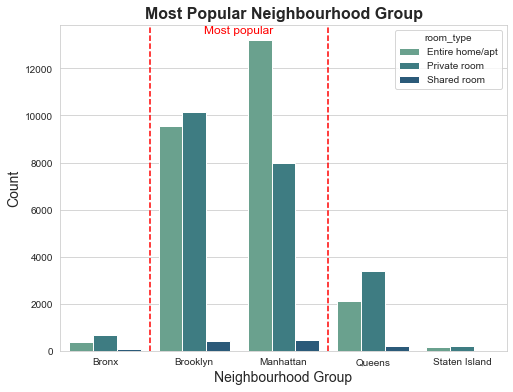

In [157]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x="neighbourhood_group", y="count", hue='room_type', data=property_count, palette='crest')


plt.title('Most Popular Neighbourhood Group', fontsize= 16, fontweight='bold' )
plt.xlabel('Neighbourhood Group', fontsize= 14)
plt.ylabel('Count', fontsize= 14)

plt.text(x=1.5, y= 13500, s='Most popular', color='red', fontsize=12, ha='center');
plt.axvline(0.5, color='red', linestyle='--')
plt.axvline(2.5, color='red', linestyle='--')

### average price

In [122]:
avg_price = df.groupby(['neighbourhood_group'])['price'].mean().reset_index(name='price_avg')
avg_price['price_avg']=round(avg_price['price_avg'],2)
avg_price

,neighbourhood_group,price_avg
0,Bronx,87.50
1,Brooklyn,124.38
2,Manhattan,196.88
3,Queens,99.52
4,Staten Island,114.81


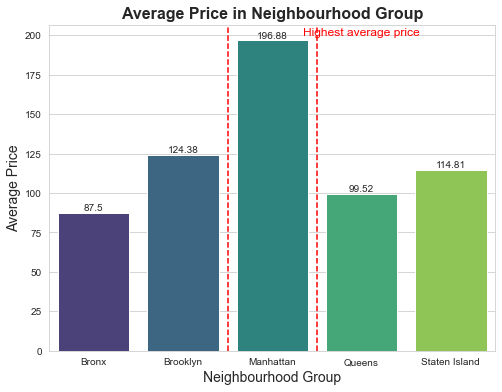

In [150]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
v2 = sns.barplot(x="neighbourhood_group", y="price_avg", data=avg_price, palette='viridis')
for i in v2.containers:
    v2.bar_label(i,)

plt.title('Average Price in Neighbourhood Group', fontsize= 16, fontweight='bold' )
plt.xlabel('Neighbourhood Group', fontsize= 14)
plt.ylabel('Average Price', fontsize= 14)

plt.text(x=3, y= 200, s='Highest average price', color='red', fontsize=12, ha='center');
plt.axvline(1.5, color='red', linestyle='--')
plt.axvline(2.5, color='red', linestyle='--')
